<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/Labyrinthe_Plus_court_chemin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Labyrinthe - Plus court chemin**

Nous entrons dans le labyrinthe suivant.

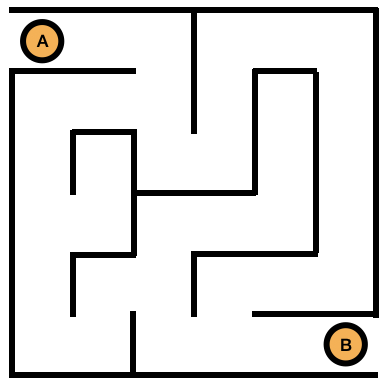

Quel est le plus court chemin pour atteindre la sortie de ce labyrinthe ? En représentant ce labyrinthe comme un graphe non pondéré, le parcours en largeur (BFS) nous permet de trouver le plus court chemin reliant 2 sommets.

Voici la représentation du labyrinthe sous forme d'un graphe :

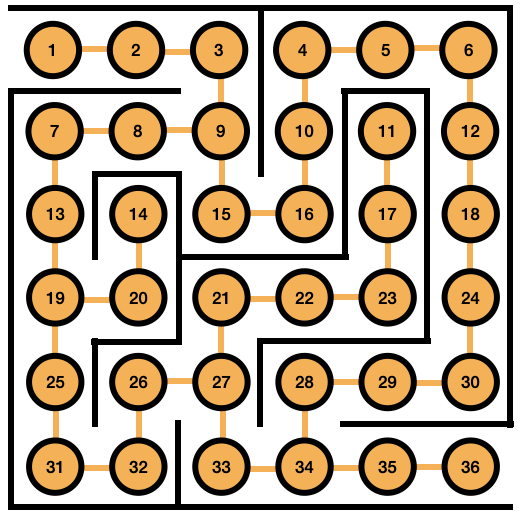

Et voici les données correspondant à ce graphe :

In [20]:
D = dict()
D[1] = {2}
D[2] = {3}
D[3] = {9}
D[4] = {5,10}
D[5] = {4,6}
D[6] = {5,12}
D[7] = {8,13}
D[8] = {7,9}
D[9] = {3,8,15}
D[10] = {4,16}
D[11] = {17}
D[12] = {6,18}
D[13] = {7,19}
D[14] = {20}
D[15] = {9,16}
D[16] = {10,15}
D[17] = {11,23}
D[18] = {12,24}
D[19] = {13,20,25}
D[20] = {14,19}
D[21] = {22,27}
D[22] = {21,23}
D[23] = {17,22}
D[24] = {18,30}
D[25] = {19,31}
D[26] = {27,32}
D[27] = {21,26,33}
D[28] = {29,34}
D[29] = {28,30}
D[30] = {24,29}
D[31] = {25,32}
D[32] = {26,31}
D[33] = {27,34}
D[34] = {28,33,35}
D[35] = {34,36}
D[36] = {35}

Nous pouvons représenter ce graphe visuellement en important les modules nécessaires.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

En cas d'erreur sur ce bloc d'instructions, lancez l'installation des modules matplotlib et networkx, redémarrez le noyau, puis re-exécutez la dernière cellule de code.

In [ ]:
import sys  
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user networkx

Voici une représentation graphique.

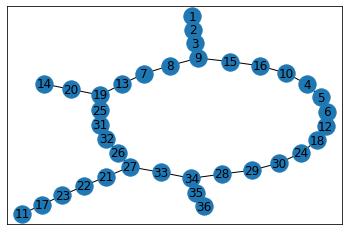

In [5]:
G = nx.Graph(D)

pos = nx.kamada_kawai_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Déterminons maintenant le plus court chemin pour aller du sommet 1 au sommet 36 par un parcours en largeur.

In [24]:
def distance(D, debut, fin):
  # A compléter

x = distance(D,1,36)
if x:
  print("Distance qui sépare le sommet 1 du sommet 36 :",x) # Résultat à obtenir : 16
else:
  print("Les sommets 1 et 36 ne sont pas reliés")

Distance qui sépare le sommet 1 du sommet 36 : 16


Il est ensuite simple d'afficher un plus court chemin.

In [28]:
def bfs(D, S):
  P = {S : None}
  Q = [S]
  while Q:
    u = Q.pop(0)
    for v in D[u]:
      if v in P:
        continue
      P[v] = u
      Q.append(v)
  return P

def chemin(D,debut,fin):
  u=fin
  c=[fin]
  P = bfs(D,1)
  for i in range(distance(D,debut,fin)):
    c.append(P[u])
    u=P[u]
  return list(reversed(c))

print(chemin(D,1,36))

[1, 2, 3, 9, 8, 7, 13, 19, 25, 31, 32, 26, 27, 33, 34, 35, 36]


## **Exemple d'utilisation**

Le parcours en largeur **BFS** permet de déterminer le plus cours chemin reliant deux sommets dans un graphe. Il est aussi utiliser pour calculer les **composantes connexes** d'un graphe, soit les sous-graphes connexes d'un graphe.

Soit le graphe représenté par les données suivantes.

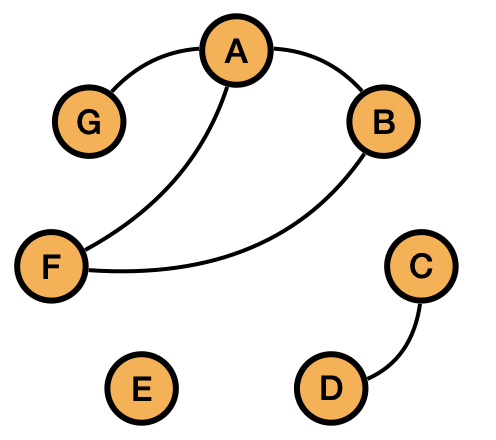

Déterminons ses composantes connexes.

Voici le jeu de données correspondant à traiter.

In [14]:
D = dict()
D['A'] = {'B','F','G'}
D['B'] = {'A','F'}
D['C'] = {'D'}
D['D'] = {'C'}
D['E'] = {}
D['F'] = {'A','B'}
D['G'] = {'A'}

Visualisons le graphe correspondant.

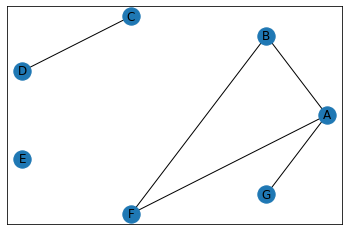

In [15]:
G = nx.Graph(D)

pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

Ce graphe a 3 composantes connexes, mais déterminons le grâce à un parcours en largeur.

Dans cet exemple, nous utiliserons les variables suivantes :
*   **c**, un compteur contenant le nombre de composantes connexes
*   **P**, un dictionnaire attribuant à chaque sommet un numéro de composante connexe



In [16]:
def bfs(G, S):
  P = {S : None}
  Q = [S]
  while Q:
    u = Q.pop(0)
    for v in G[u]:
      if v in P:
        continue
      P[v] = u
      Q.append(v)
  return P

def composantes(G):
  c=0
  P={}
  for i in G:
    P[i]=0
  for s in P:
    if(P[s]==0):
      c+=1
      D=bfs(G,s)
      for x in D:
        P[x]=c
  print(P)
  return c

print('Nombre de composantes connexes de G : ',composantes(G))

{'A': 1, 'B': 1, 'C': 2, 'D': 2, 'E': 3, 'F': 1, 'G': 1}
Nombre de composantes connexes de G :  3


Le graphe G a 3 composantes connexes. Nous observons que les sommets A, B, F et G sont une première composante connexe, les sommets C et D une seconde composante connexe, et le sommet E est la 3ème composante connexe de ce graphe.

Si nous travaillons sur un graphe orienté, il sera nécessaire de parcourir le graphe G et son inverse G⁻¹.

G :

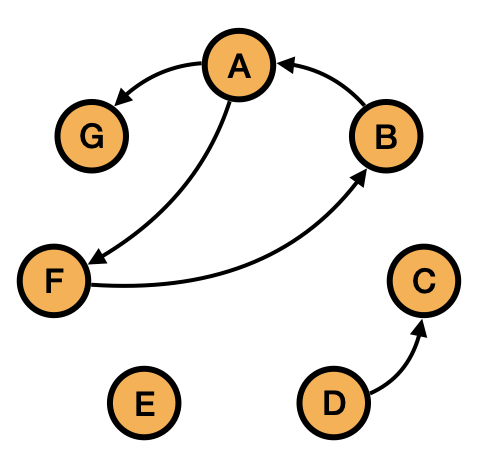

G⁻¹ :

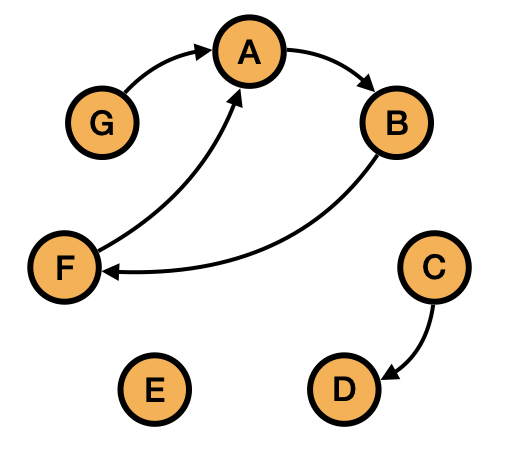

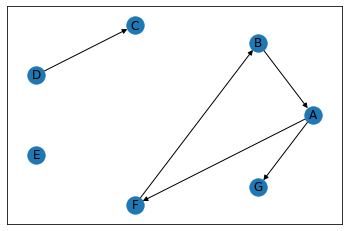

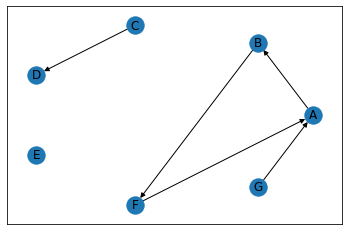

In [17]:
D = dict()
D['A'] = {'F','G'}
D['B'] = {'A'}
D['C'] = {}
D['D'] = {'C'}
D['E'] = {}
D['F'] = {'B'}
D['G'] = {}

G = nx.DiGraph(D)

pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

G2 = G.reverse()

nx.draw_networkx_nodes(G2, pos)
nx.draw_networkx_labels(G2, pos)
nx.draw_networkx_edges(G2, pos)

plt.show()

Voici le code modifié incluant le parcours du graphe inverse.

In [18]:
def bfs(G, S):
  P = {S : None}
  Q = [S]
  while Q:
    u = Q.pop(0)
    for v in G[u]:
      if v in P:
        continue
      P[v] = u
      Q.append(v)
  return P

def composantes(G):
  c=0
  P={}
  for i in G:
    P[i]=0
  for s in P:
    if(P[s]==0):
      c+=1
      D=bfs(G,s)
      for x in D:
        P[x]=c
      D=bfs(G.reverse(),s)
      for x in D:
        P[x]=c
  print(P)
  return c

print('Nombre de composantes connexes de G : ',composantes(G))

{'A': 1, 'B': 1, 'C': 2, 'D': 2, 'E': 3, 'F': 1, 'G': 1}
Nombre de composantes connexes de G :  3
